<a href="https://colab.research.google.com/github/LJadhav25/Support-Vector-Machine/blob/main/Support_Vector_Machine(Data_Science).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [15]:
data = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [16]:
Social_Network = pd.read_csv('Social_Network_Ads.csv')

In [17]:
Social_Network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
Social_Network.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
Social_Network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [20]:
Social_Network['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
Social_Network.drop('User ID',axis=1,inplace=True)

In [22]:
Social_Network.drop('Gender',axis=1,inplace=True)

In [23]:
Social_Network.corr()['Purchased']*100

Age                 62.245420
EstimatedSalary     36.208303
Purchased          100.000000
Name: Purchased, dtype: float64

<Axes: >

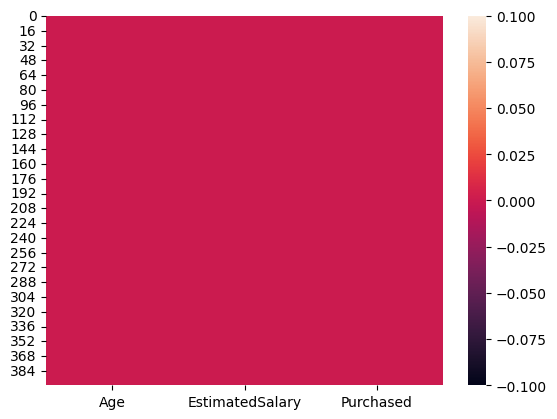

In [24]:
sns.heatmap(Social_Network.isnull())

<Axes: >

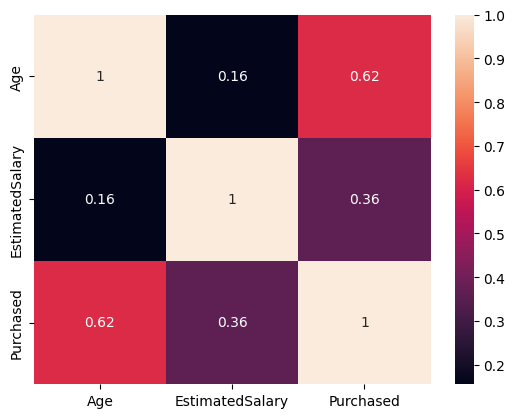

In [25]:
sns.heatmap(Social_Network.corr(),annot=True)

# Standerd Scaler

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(Social_Network.drop('Purchased',axis=True))

StandardScaler()

In [29]:
scaler_feat = scaler.transform(Social_Network.drop('Purchased',axis=True))

In [33]:
scaler_feat

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

**THE ABOVE SCALER_FEAT IS IN THE ARRAY FORMAT SO WE CONVERTED IT INTO TABLE BELOW**

In [34]:
new_Social_Network = pd.DataFrame(scaler_feat,columns=Social_Network.columns[:-1])

In [35]:
new_Social_Network.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


# SPLIT

In [36]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(new_Social_Network,Social_Network['Purchased'],test_size = 0.30,random_state=60)

In [41]:
X_train.shape

(280, 2)

In [42]:
Y_test.shape

(120,)

In [48]:
X_test.shape

(120, 2)

# Algorithm

In [43]:
from sklearn.svm import SVC

In [44]:
classifier = SVC()

In [45]:
classifier.fit(X_train,Y_train)

SVC()

In [46]:
predict = classifier.predict(X_test)

In [47]:
predict

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

**FINDING OUT ACCURACY SCORE**

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [50]:
accuracy_score(Y_test,predict)*100

89.16666666666667

In [51]:
confusion_matrix(Y_test,predict)

array([[75,  7],
       [ 6, 32]])